<a href="https://colab.research.google.com/github/shreyaM98/Coursera_Tensorflow/blob/main/AvoidOverfitting_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


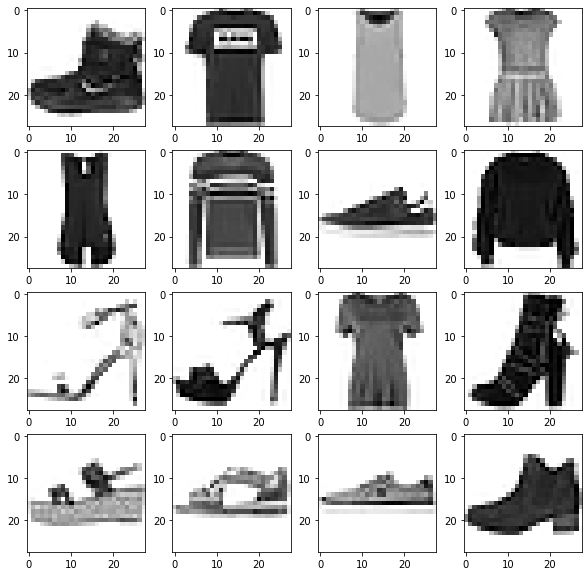

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i], cmap = 'binary')
plt.show()

Preprocessing the Data

In [ ]:
#from tensorflow.python.keras.utils import to_categorical
# import tensorflow.python.keras
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)
print (y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense, Dropout 
from tensorflow.python.keras. regularizers import l2

nodes = 64

def create_model(weight_reg = False, dropout_reg = False):
  model = Sequential()
  if weight_reg:
    model.add(Dense(nodes, activation='relu',
    input_shape=(784,), kernel_regularizer = 12(0.001)))
    model.add(Dense(nodes, activation='relu', kernel_regularizer=12(0.001)))
  else:
    model.add(Dense(nodes, activation='relu', input_shape = (784,))) 
    model.add(Dense(nodes, activation='relu'))

  if dropout_reg:
    model.add(Dropout(0.2)) 

  model.add(Dense(10, activation='softmax'))
  model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
    )
  model.summary()
  return model

In [ ]:
def show_acc(h, E):
  plt.plot(range(E), h.history['accuracy'], label = 'Training')
  plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
  plt.ylim([0.7, 1.0]) 
  plt.legend()
  plt.show()
  return

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_t = x_train.reshape(x_train.shape[0],x_train.shape[1] * x_train.shape[2])

In [ ]:
x_te = x_test.reshape(x_test.shape[0],x_test.shape[1] * x_test.shape[2])

In [ ]:
x_te.shape

(10000, 784)

In [ ]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_log = LambdaCallback( 
    on_epoch_end = lambda e, l: print(e, end = '.')
)

def run_experiment(E = 20, weight_reg = False, dropout_reg = False):
  m = create_model(weight_reg, dropout_reg)
  h = m.fit( x_t, y_train, 
            epochs = E, verbose = False, 
            validation_data = (x_te, y_test), 
            callbacks = [simple_log]
            )
  #print(h.history)
  show_acc(h, E)
  return

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

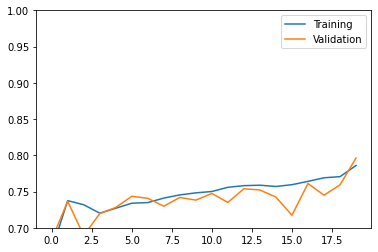

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

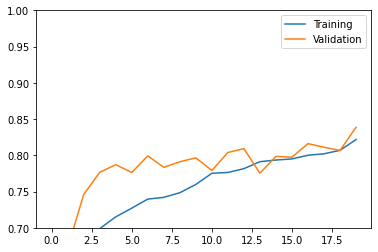

In [ ]:
run_experiment()    #without regularization
run_experiment(weight_reg= False, dropout_reg= True) 